##  AutoRegressive Moving Average Model for Kota Bharu water level data

An autoregression model is a regression with a time series and itself, shifted by a time step or steps. These are called lags. I demonstrate this dataset to see the results in the original dataset along with the forecasted dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')

/Users/ZachAnaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ZachAnaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
water_level = pd.read_csv('cleaned-JPS WL data-kbharu.csv')  
water_level.head(5)

,Date,Stage m
0,2010-01-01,0.20
1,2010-02-01,0.20
2,2010-03-01,0.20
3,2010-04-01,0.18
4,2010-05-01,0.21


In [3]:
# check data types
water_level.dtypes

Date        object
Stage m    float64
dtype: object

In [4]:
# convert date to datetime
from datetime import datetime
water_level['Date'] = pd.to_datetime(water_level['Date'])
water_level.dtypes

Date       datetime64[ns]
Stage m           float64
dtype: object

In [5]:
# set date as index
water_level.set_index('Date', inplace=True)
water_level

,Stage m
Date,
2010-01-01,0.20
2010-02-01,0.20
2010-03-01,0.20
2010-04-01,0.18
2010-05-01,0.21
...,...
2019-07-27,0.21
2019-07-28,0.20
2019-07-29,0.11


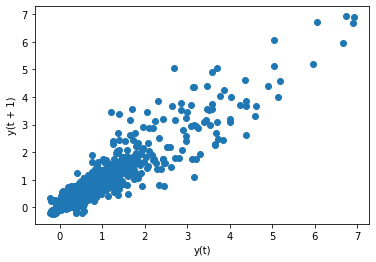

In [6]:
# Plot the time series against its lag
lag_plot(water_level)
pyplot.show()

In [7]:
from pandas import concat

values = pd.DataFrame(water_level.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.928502
t+1  0.928502  1.000000


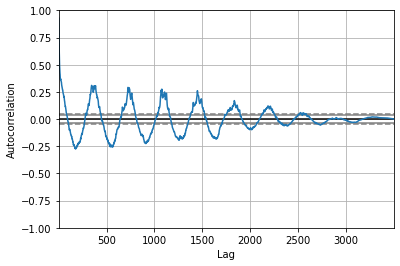

In [8]:
# Plot the autocorrelation of the dataset
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(water_level)
pyplot.show()

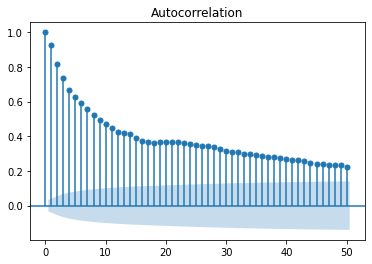

In [9]:
# Plot the Autocorrelation Function, using candle sticks

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(water_level, lags=50)
pyplot.show()

In [10]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(water_level, order=(1,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters
#nNotImplementedError: solution-install older version of statsmodels(0.11.0)

                              ARMA Model Results                              
Dep. Variable:                Stage m   No. Observations:                 3499
Model:                     ARMA(1, 0)   Log Likelihood                 327.637
Method:                       css-mle   S.D. of innovations              0.220
Date:                Mon, 07 Mar 2022   AIC                           -649.274
Time:                        22:50:38   BIC                           -630.793
Sample:                             0   HQIC                          -642.678
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6861      0.052     13.234      0.000       0.585       0.788
ar.L1.Stage m     0.9284      0.006    148.153      0.000       0.916       0.941
                                    Root

The best model chosen is the one with the lowest Information Criterion. The AIC shows the lowest.



45.3 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


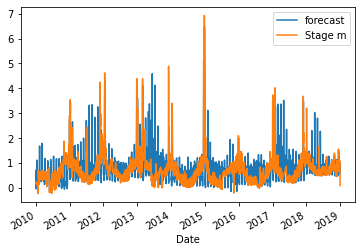

In [11]:
# Forecasting
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
%timeit mod = ARMA(water_level, order=(1,0))
res = mod.fit()


res.plot_predict(start='2010', end='2019')
pyplot.show()